In [1]:
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
path = os. getcwd() 
path

'/Users/hexuanliu/Covid-Forecast'

In [2]:
filename = '/Users/hexuanliu/Covid-Forecast/us_population.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\t") for line in lines]

In [3]:
population_map = {}
for a in lines:
    population_map[a[0]]=int(a[3].replace(',', ''))
print(population_map)

{'United States of America': 331893745, 'Alabama': 5039877, 'Alaska': 732673, 'Arizona': 7276316, 'Arkansas': 3025891, 'California': 39237836, 'Colorado': 5812069, 'Connecticut': 3605597, 'Delaware': 1003384, 'District of Columbia': 670050, 'Florida': 21781128, 'Georgia': 10799566, 'Hawaii': 1441553, 'Idaho': 1900923, 'Illinois': 12671469, 'Indiana': 6805985, 'Iowa': 3193079, 'Kansas': 2934582, 'Kentucky': 4509394, 'Louisiana': 4624047, 'Maine': 1372247, 'Maryland': 6165129, 'Massachusetts': 6984723, 'Michigan': 10050811, 'Minnesota': 5707390, 'Mississippi': 2949965, 'Missouri': 6168187, 'Montana': 1104271, 'Nebraska': 1963692, 'Nevada': 3143991, 'New Hampshire': 1388992, 'New Jersey': 9267130, 'New Mexico': 2115877, 'New York': 19835913, 'North Carolina': 10551162, 'North Dakota': 774948, 'Ohio': 11780017, 'Oklahoma': 3986639, 'Oregon': 4246155, 'Pennsylvania': 12964056, 'Rhode Island': 1095610, 'South Carolina': 5190705, 'South Dakota': 895376, 'Tennessee': 6975218, 'Texas': 29527941

In [4]:
state_names=list(population_map.keys())
print(state_names)

['United States of America', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


In [5]:
len(state_names)

53

In [6]:
## store location_id to string mapping
filename = '/Users/hexuanliu/Downloads/Jerzak/location_ids_111_9.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

location_map = dict()
for i in range(1,len(lines)):
    temp = lines[i]
    
    location_id = int(temp[2])
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        location_map[location_id] = temp[13]
        
print(location_map)

{102: 'United States of America', 523: 'Alabama', 524: 'Alaska', 525: 'Arizona', 526: 'Arkansas', 527: 'California', 528: 'Colorado', 529: 'Connecticut', 530: 'Delaware', 531: 'District of Columbia', 532: 'Florida', 533: 'Georgia', 534: 'Hawaii', 535: 'Idaho', 536: 'Illinois', 537: 'Indiana', 538: 'Iowa', 539: 'Kansas', 540: 'Kentucky', 541: 'Louisiana', 542: 'Maine', 543: 'Maryland', 544: 'Massachusetts', 545: 'Michigan', 546: 'Minnesota', 547: 'Mississippi', 548: 'Missouri', 549: 'Montana', 550: 'Nebraska', 551: 'Nevada', 552: 'New Hampshire', 553: 'New Jersey', 554: 'New Mexico', 555: 'New York', 556: 'North Carolina', 557: 'North Dakota', 558: 'Ohio', 559: 'Oklahoma', 560: 'Oregon', 561: 'Pennsylvania', 562: 'Rhode Island', 563: 'South Carolina', 564: 'South Dakota', 565: 'Tennessee', 566: 'Texas', 567: 'Utah', 568: 'Vermont', 569: 'Virginia', 570: 'Washington', 571: 'West Virginia', 572: 'Wisconsin', 573: 'Wyoming'}


In [7]:
## location str to id reverse map
filename = '/Users/hexuanliu/Downloads/Jerzak/location_ids_111_9.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

reverse_location_map = dict()
for i in range(1,len(lines)):
    temp = lines[i]
    
    location_id = int(temp[2])
    location = temp[13]
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        reverse_location_map[location] = location_id
        
print(reverse_location_map)

{'United States of America': 102, 'Alabama': 523, 'Alaska': 524, 'Arizona': 525, 'Arkansas': 526, 'California': 527, 'Colorado': 528, 'Connecticut': 529, 'Delaware': 530, 'District of Columbia': 531, 'Florida': 532, 'Georgia': 533, 'Hawaii': 534, 'Idaho': 535, 'Illinois': 536, 'Indiana': 537, 'Iowa': 538, 'Kansas': 539, 'Kentucky': 540, 'Louisiana': 541, 'Maine': 542, 'Maryland': 543, 'Massachusetts': 544, 'Michigan': 545, 'Minnesota': 546, 'Mississippi': 547, 'Missouri': 548, 'Montana': 549, 'Nebraska': 550, 'Nevada': 551, 'New Hampshire': 552, 'New Jersey': 553, 'New Mexico': 554, 'New York': 555, 'North Carolina': 556, 'North Dakota': 557, 'Ohio': 558, 'Oklahoma': 559, 'Oregon': 560, 'Pennsylvania': 561, 'Rhode Island': 562, 'South Carolina': 563, 'South Dakota': 564, 'Tennessee': 565, 'Texas': 566, 'Utah': 567, 'Vermont': 568, 'Virginia': 569, 'Washington': 570, 'West Virginia': 571, 'Wisconsin': 572, 'Wyoming': 573}


In [9]:
## calculate correlation btw two states ts

filename = '/Users/hexuanliu/Covid-Forecast/IHME/Arizona_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list1 = []
for a in lines:
    truth_list1.append(float(a[0]))
    
filename = '/Users/hexuanliu/Covid-Forecast/IHME/Texas_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list2 = []
for a in lines:
    truth_list2.append(float(a[0]))
np.corrcoef(truth_list1, truth_list2)

array([[1.        , 0.78520219],
       [0.78520219, 1.        ]])

[Text(0.5, 0, 'New Hampshire'),
 Text(1.5, 0, 'Illinois'),
 Text(2.5, 0, 'Rhode Island'),
 Text(3.5, 0, 'Minnesota'),
 Text(4.5, 0, 'Texas')]

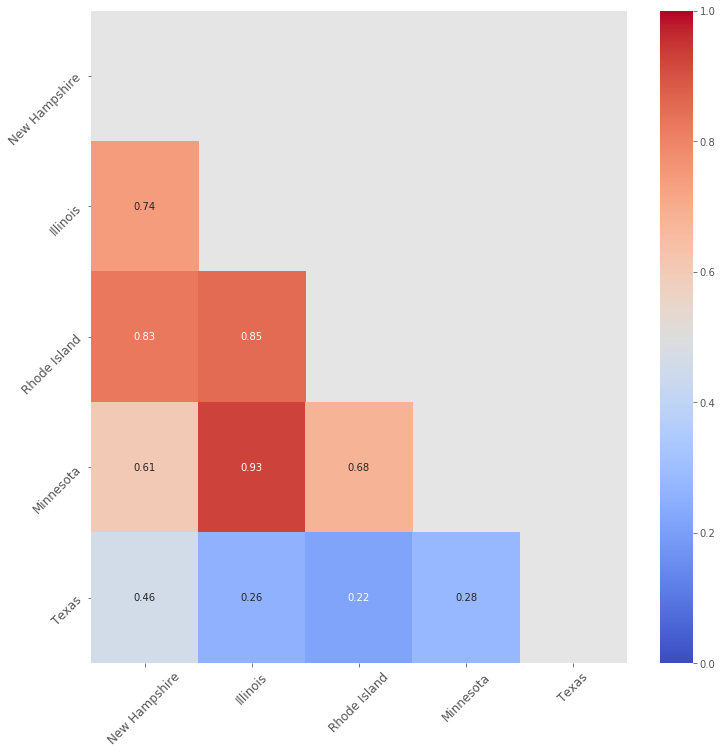

In [257]:
## plot correlation matrix

import pandas as pd
## southwest
state_list = ['New Hampshire', 'Illinois','Rhode Island','Minnesota','Texas']
#state_list = ['Kentucky','Utah','New Mexico', 'Missouri','Texas']
#state_list = ['Michigan', 'New Jersey', 'Connecticut','District of Columbia','Massachusetts', 'Pennsylvania']
#state_list = ['Alabama','Mississippi','Virginia','Washington','South Carolina','Oklahoma']
#state_list = ['Arkansas', 'Wisconsin', 'North Carolina', 'Indiana', 'Pennsylvania','California','Iowa','Idaho']

#state_list = ['Nebraska','Ohio','Oregon','Iowa','New Hampshire','Illinois','Alabama','US']
#state_list = ['Connecticut','Maryland','Massachusetts','Michigan','New Jersey'] ## east coast
#state_list = ['North Dakota','South Dakota','Wyoming']
#state_list = ['Louisiana','Delaware','Maryland','US']
#state_list = state_names.copy()
# state_list.remove('New York')
# state_list.remove('Connecticut')
# state_list.remove('Maryland')
# state_list.remove('Massachusetts')
# state_list.remove('Michigan')
# state_list.remove('New Jersey')

ns = len(state_list)
nt = 61
truth_matrix = np.zeros((nt,ns))
for i,state in enumerate(state_list):
    #print(state)
    if state=='US':
        filename = '/Users/hexuanliu/Covid-Forecast/IHME/United States of America_true_data.txt'
    else:
        filename = '/Users/hexuanliu/Covid-Forecast/IHME/%s_true_data.txt' %state
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split("\n") for line in lines]
    truth_list1 = []
    for a in lines:
        truth_list1.append(float(a[0]))
    truth_matrix[:, i]=truth_list1[:61]
    

# rs = np.random.RandomState(0)
df = pd.DataFrame(data=truth_matrix, columns=state_list)
corr = df.corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap='coolwarm',axis=None, vmin=0, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(2)

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'),vmin=0, vmax=1, cbar=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)

CDC weekly average: 240.31215170987934
IHME weekly average 234.45795005325942


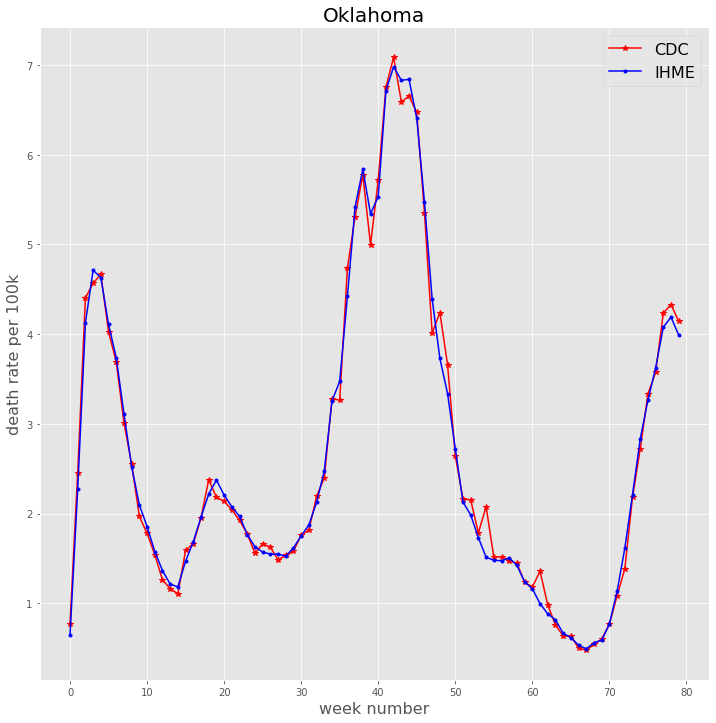

In [14]:
## Plot the outliers truth death rate
## Oklahoma, Kentucky, Virginia (CDC); New York, Louisiana, Wyoming (IHME)

filename = '/Users/hexuanliu/Covid-Forecast/United States of America_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list1 = []

for a in lines:
    truth_list1.append(float(a[0]))
    
print('CDC weekly average:', np.sum(truth_list1[0:90]))

filename = '/Users/hexuanliu/Covid-Forecast/IHME/United States of America_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list2 = []
for a in lines:
    truth_list2.append(float(a[0]))
print('IHME weekly average',np.sum(truth_list2[2:92]))

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.plot(truth_list1[0:80],'r*-',label='CDC')
plt.plot(truth_list2[2:82],'b.-',label='IHME')
plt.xlabel('week number', fontsize=16)
plt.ylabel('death rate per 100k', fontsize=16)
plt.legend(fontsize=16)
plt.title('Oklahoma', fontsize=20)
plt.show()

CDC weekly average: 249.57125215113652
IHME weekly average 225.21158721091518
IHME weekly average 210.17306093431498
IHME weekly average 104.50908296948857
IHME weekly average 250.94496568851065


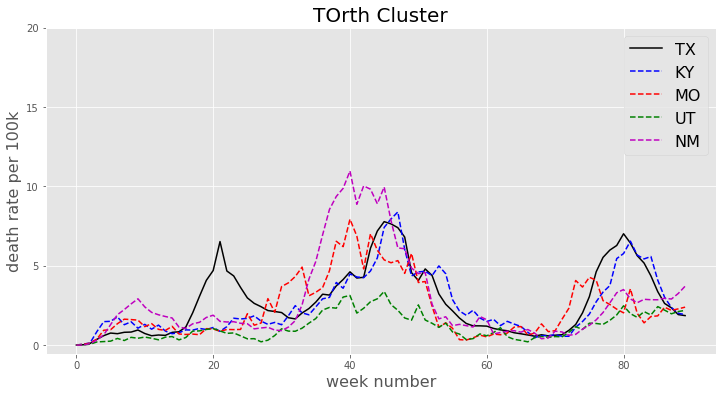

In [21]:
## Plot the outliers truth death rate
## Oklahoma, Kentucky, Virginia (CDC); New York, Louisiana, Wyoming (IHME)

filename = '/Users/hexuanliu/Covid-Forecast/IHME/Texas_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list1 = []

for a in lines:
    truth_list1.append(float(a[0]))
    
print('CDC weekly average:', np.sum(truth_list1[0:90]))

filename = '/Users/hexuanliu/Covid-Forecast/IHME/Kentucky_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list2 = []
for a in lines:
    truth_list2.append(float(a[0]))
print('IHME weekly average',np.sum(truth_list2[0:90]))

filename = '/Users/hexuanliu/Covid-Forecast/IHME/Missouri_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list3 = []
for a in lines:
    truth_list3.append(float(a[0]))
print('IHME weekly average',np.sum(truth_list3[0:90]))

filename = '/Users/hexuanliu/Covid-Forecast/IHME/Utah_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list4 = []
for a in lines:
    truth_list4.append(float(a[0]))
print('IHME weekly average',np.sum(truth_list4[0:90]))

filename = '/Users/hexuanliu/Covid-Forecast/IHME/New Mexico_true_data.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth_list5 = []
for a in lines:
    truth_list5.append(float(a[0]))
print('IHME weekly average',np.sum(truth_list5[0:90]))




plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(truth_list1[0:90],'k-',label='TX')
plt.plot(truth_list2[0:90],'b--',label='KY')
plt.plot(truth_list3[0:90],'r--',label='MO')
plt.plot(truth_list4[0:90],'g--',label='UT')
plt.plot(truth_list5[0:90],'m--',label='NM')

plt.xlabel('week number', fontsize=16)
plt.ylabel('death rate per 100k', fontsize=16)
plt.yticks([0,5,10,15,20])
plt.legend(fontsize=16)
plt.title('TOrth Cluster', fontsize=20)
plt.show()

In [841]:
## open the truth data file
filename = '/Users/hexuanliu/Downloads/Jerzak/ihme_truth_inc_death_wk.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

## filter location_id and map to US states strings
US_truth = []
for i in range(1,len(lines)):
    temp = lines[i]
    location_id = int(temp[0])
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        temp[0] = location_map[location_id]
        US_truth.append(temp)

In [842]:
## truth death rate per state
def extract_state_truth(state, start_week, end_week, full_list):
    ## return a map for the given state and time period
    ## state: string, date: datetime, full_list: list of all states data
    weekly_map={}
    
    for a in full_list:
        week = int(float(a[1]))
        if a[0]==state and week>=start_week and week<=end_week:
            weekly_map[a[1]]=float(a[2])/population_map[a[0]] * 100000
    return weekly_map

In [843]:
## get state truth data and write to IHME/state_true_data.txt
start_week = 10 ## 2020-03-07, target end date
end_week = 100 ## 2021-12-04
#state_names = set(location_map.values())
for state in state_names:
    weekly_map = extract_state_truth(state, start_week, end_week, US_truth)
    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/%s_true_data.txt" %state, "w")
    for element in list(weekly_map.values()):
        textfile.write(str(element) + "\n")
    textfile.close()

In [845]:
US_truth

[['United States of America', '0.0', '0.0', 'inc death'],
 ['United States of America', '1.0', '0.0', 'inc death'],
 ['United States of America', '2.0', '0.0', 'inc death'],
 ['United States of America', '3.0', '0.010875600167621', 'inc death'],
 ['United States of America', '4.0', '0.043081184956469995', 'inc death'],
 ['United States of America', '5.0', '0.039067596237399076', 'inc death'],
 ['United States of America', '6.0', '0.2287486820036973', 'inc death'],
 ['United States of America', '7.0', '0.115714516113403', 'inc death'],
 ['United States of America', '8.0', '3.2913443434805236', 'inc death'],
 ['United States of America', '9.0', '15.550968652942036', 'inc death'],
 ['United States of America', '10.0', '49.500817621197', 'inc death'],
 ['United States of America', '11.0', '378.6743911339023', 'inc death'],
 ['United States of America', '12.0', '2135.0708656480215', 'inc death'],
 ['United States of America', '13.0', '7555.100978981085', 'inc death'],
 ['United States of Am

In [31]:
filename = '/Users/hexuanliu/Downloads/Jerzak/inc_death.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]
method_names = set()
for i in range(1,len(lines)):
    method_names.add(lines[i][0])
temp = []
all_methods = set()
for a in lines[1:]:
    location_id = int(a[3])
    if location_id==102 or ((location_id >=523 and location_id <=573)):
        temp.append(a)
        all_methods.add(a[0])

In [8]:
import datetime
# date in yyyy/mm/dd format
d1 = datetime.datetime(2018, 5, 3)
d2 = datetime.datetime(2020, 2, 2)
def isBetweenDate(x, start_date, end_date):
    ## start and end_date are in datetime format, x is a string "year-month-date"
    temp = x.split('-')
    d = datetime.datetime(int(temp[0]), int(temp[1]), int(temp[2]))
    if d>=start_date and d<=end_date:
        return True
    return False

isBetweenDate('2020-02-03', d1, d2)

False

In [9]:
###################################### CDC data: truth and forecasts ##############################################
filename = 'truth-state.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]
state_truth=lines[2234674:]
state_truth

[['2020-01-22', '01', 'Alabama', '0'],
 ['2020-01-23', '01', 'Alabama', '0'],
 ['2020-01-24', '01', 'Alabama', '0'],
 ['2020-01-25', '01', 'Alabama', '0'],
 ['2020-01-26', '01', 'Alabama', '0'],
 ['2020-01-27', '01', 'Alabama', '0'],
 ['2020-01-28', '01', 'Alabama', '0'],
 ['2020-01-29', '01', 'Alabama', '0'],
 ['2020-01-30', '01', 'Alabama', '0'],
 ['2020-01-31', '01', 'Alabama', '0'],
 ['2020-02-01', '01', 'Alabama', '0'],
 ['2020-02-02', '01', 'Alabama', '0'],
 ['2020-02-03', '01', 'Alabama', '0'],
 ['2020-02-04', '01', 'Alabama', '0'],
 ['2020-02-05', '01', 'Alabama', '0'],
 ['2020-02-06', '01', 'Alabama', '0'],
 ['2020-02-07', '01', 'Alabama', '0'],
 ['2020-02-08', '01', 'Alabama', '0'],
 ['2020-02-09', '01', 'Alabama', '0'],
 ['2020-02-10', '01', 'Alabama', '0'],
 ['2020-02-11', '01', 'Alabama', '0'],
 ['2020-02-12', '01', 'Alabama', '0'],
 ['2020-02-13', '01', 'Alabama', '0'],
 ['2020-02-14', '01', 'Alabama', '0'],
 ['2020-02-15', '01', 'Alabama', '0'],
 ['2020-02-16', '01', 'Al

In [545]:
state_set = set()
for a in state_truth:
    state_set.add(a[2])
print(state_set)

{'Texas', 'North Carolina', 'Oregon', 'Puerto Rico', 'Nebraska', 'Delaware', 'Utah', 'California', 'Arkansas', 'New Hampshire', 'Washington', 'New Jersey', 'Northern Mariana Islands', 'South Dakota', 'Indiana', 'Kansas', 'Pennsylvania', 'District of Columbia', 'Iowa', 'Idaho', 'Florida', 'Guam', 'Michigan', 'Wisconsin', 'Maryland', 'West Virginia', 'Nevada', 'Oklahoma', 'Virginia', 'Montana', 'Ohio', 'Massachusetts', 'North Dakota', 'Mississippi', 'Missouri', 'Rhode Island', 'South Carolina', 'Connecticut', 'Alaska', 'Illinois', 'Virgin Islands', 'Minnesota', 'US', 'New York', 'American Samoa', 'Wyoming', 'Kentucky', 'Louisiana', 'New Mexico', 'Tennessee', 'Hawaii', 'Alabama', 'Maine', 'Georgia', 'Arizona', 'Vermont', 'Colorado'}


In [546]:
def extract_state_truth(state, start_date, end_date, full_list):
    ## return a map for the given state and time period. avg over a week
    ## state: string, date: datetime, full_list: list of all states data
    weekly_map={}
    j = 0
    weekly = 0
    for a in full_list:
        if a[2]==state and isBetweenDate(a[0], start_date, end_date):
            if j<6:
                weekly = weekly + int(a[3])
                j = j + 1
            elif j==6:
                weekly = weekly + int(a[3])
                if a[2]=='US':
                    weekly_map[a[0]]=float(weekly)/population_map['United States of America']*100000
                else:
                    weekly_map[a[0]]=float(weekly)/population_map[a[2]]* 100000
                
                j = 0
                weekly = 0
    return weekly_map

In [547]:
## get state truth data and write to state_true_data.txt

start_date = datetime.datetime(2020, 3, 22)
end_date = datetime.datetime(2021, 12, 30)
for state in state_names:
    if state=='United States of America':
        weekly_map = extract_state_truth('US', start_date, end_date, state_truth)
    else:
        weekly_map = extract_state_truth(state, start_date, end_date, state_truth)
    textfile = open("%s_true_data.txt" %state, "w")
    for element in list(weekly_map.values()):
        textfile.write(str(element) + "\n")
    textfile.close()

In [548]:
us_truth=extract_state_truth('Washington', start_date, end_date, state_truth)
us_truth

{'2020-03-28': 1.21467555499043,
 '2020-04-04': 2.7136368781701097,
 '2020-04-11': 1.9253899754635537,
 '2020-04-18': 1.5377275642963955,
 '2020-04-25': 1.4601950820629637,
 '2020-05-02': 1.072532670895805,
 '2020-05-09': 1.1629872335014755,
 '2020-05-16': 0.9303897868011802,
 '2020-05-23': 0.6590260989841694,
 '2020-05-30': 0.542727375634022,
 '2020-06-06': 0.542727375634022,
 '2020-06-13': 0.6202598578674536,
 '2020-06-20': 0.4651948934005901,
 '2020-06-27': 0.5814936167507377,
 '2020-07-04': 0.607337777495215,
 '2020-07-11': 0.83993522419551,
 '2020-07-18': 0.6202598578674536,
 '2020-07-25': 0.9562339475456576,
 '2020-08-01': 1.2534417961071458,
 '2020-08-08': 1.1888313942459527,
 '2020-08-15': 1.0337664297790894,
 '2020-08-22': 0.6977923401008853,
 '2020-08-29': 0.6977923401008853,
 '2020-09-05': 0.5556494560062605,
 '2020-09-12': 0.4651948934005901,
 '2020-09-19': 0.6202598578674536,
 '2020-09-26': 0.6202598578674536,
 '2020-10-03': 0.6331819382396922,
 '2020-10-10': 0.58149361675

In [10]:
def extract_state_forecast(method_set, state, forecast_list):
    ## method_set (list of strings): a set of forecasts method
    ## state (string)
    ## start and end date (datetime), 4 wk out
    ## forecast_list (list of lists): a[0] method name, a[1] start date, a[3] end date (forecast date), a[4] state, a[5] point value
    
    ## for a given state, return result: a mx4 matrix, where m is the #methods
    result = []
    j = 0
    tmp = []
    for a in forecast_list:
        if (a[4]==state) and (a[0] in method_set) and ("inc death" in a[2]):
            value = float(a[5])
            if float(a[5])<0.0001:
                value = 0.0001
            if state=='National':
                tmp.append(value/population_map['United States of America']*100000)
            else:
                tmp.append(value/population_map[a[4]]*100000)
            
#             if j==0:
#                 tmp.append(a[0])
#                 print(a[0])              
            
            j = j+1
            if j==4:
                result.append(tmp)
                j = 0
                tmp = []
    return result

In [50]:
## extract CDC ensemble list: avg of all available forecasts

method_set={'Ensemble'}
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    for state in state_names:
        
        filename = "state_forecast_data/2021-%s-model-data.csv" %tempDate
        with open(filename) as file:
            l = file.readlines()
            l = [(line.rstrip()).split(",") for line in l]
        forecast_list = l[1:]
        if state=='United States of America':
            result = extract_state_forecast(method_set, 'National', forecast_list)
        else:
            result = extract_state_forecast(method_set, state, forecast_list)
        
        textfile = open("%s_CDC_Ensemble_list_%s.txt" %(state,tempDate), "w")
        for element in result:
            temp =  str(element).replace('[','').replace(']','')
            #print(temp)
            textfile.write(temp + "\n")
        textfile.close()

In [11]:
## extract CDC ensemble list: avg of all available forecasts

method_set={'Ensemble'}
for tempDate in ["05-16"]:
    for state in state_names:
        
        filename = "state_forecast_data/2022-%s-model-data.csv" %tempDate
        with open(filename) as file:
            l = file.readlines()
            l = [(line.rstrip()).split(",") for line in l]
        forecast_list = l[1:]
        if state=='United States of America':
            result = extract_state_forecast(method_set, 'National', forecast_list)
        else:
            result = extract_state_forecast(method_set, state, forecast_list)
        
        textfile = open("%s_CDC_Ensemble_list_%s.txt" %(state,tempDate), "w")
        for element in result:
            temp =  str(element).replace('[','').replace(']','')
            #print(temp)
            textfile.write(temp + "\n")
        textfile.close()

In [233]:
method_set={'MOBS','BPagano','UGA-CEID','Karlen','CovidComplete'}
#method_set = {'MOBS','BPagano','JHU-APL','Karlen','CovidComplete','UCSD-NEU'}
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    for state in state_names:
        
        filename = "state_forecast_data/2021-%s-model-data.csv" %tempDate
        with open(filename) as file:
            l = file.readlines()
            l = [(line.rstrip()).split(",") for line in l]
        forecast_list = l[1:]
        #method_set = {'BPagano','MOBS','ESG','USC'}
        if state=='United States of America':
            result = extract_state_forecast(method_set, 'National', forecast_list)
        else:
            result = extract_state_forecast(method_set, state, forecast_list)
        if (len(result)<5):
            print(state)
            print(tempDate)
            print(result)
        textfile = open("%s_forecast_list_%s.txt" %(state,tempDate), "w")
        for element in result:
            temp =  str(element).replace('[','').replace(']','')
            #print(temp)
            textfile.write(temp + "\n")
        textfile.close()

US
05-24
[]
District of Columbia
05-24
[[1.193940750690247, 1.4924259383628087, 1.6416685321990896, 1.6416685321990896], [1.0446981568539662, 0.8954555630176853, 0.8954555630176853, 1.0446981568539662], [0.5969703753451235, 0.4477277815088426, 0.29848518767256177, 0.29848518767256177], [0.4477277815088426, 0.5969703753451235, 0.29848518767256177, 0.14924259383628088]]
District of Columbia
05-24
[[1.193940750690247, 1.4924259383628087, 1.6416685321990896, 1.6416685321990896], [1.0446981568539662, 0.8954555630176853, 0.8954555630176853, 1.0446981568539662], [0.5969703753451235, 0.4477277815088426, 0.29848518767256177, 0.29848518767256177], [0.4477277815088426, 0.5969703753451235, 0.29848518767256177, 0.14924259383628088]]
US
06-07
[]
District of Columbia
06-07
[[0.29848518767256177, 0.14924259383628088, 0.14924259383628088, 0.14924259383628088], [0.5969703753451235, 0.5969703753451235, 0.7462129691814043, 0.5969703753451235], [0.4477277815088426, 0.29848518767256177, 0.29848518767256177,

US
08-16
[]
District of Columbia
08-16
[[0.5969703753451235, 0.7462129691814043, 0.7462129691814043, 0.8954555630176853], [1.4924259383628088e-05, 1.4924259383628088e-05, 0.14924259383628088, 0.14924259383628088], [0.4477277815088426, 0.7462129691814043, 1.0446981568539662, 1.6416685321990896], [0.5969703753451235, 1.343183344526528, 0.8954555630176853, 0.8954555630176853]]
District of Columbia
08-16
[[0.5969703753451235, 0.7462129691814043, 0.7462129691814043, 0.8954555630176853], [1.4924259383628088e-05, 1.4924259383628088e-05, 0.14924259383628088, 0.14924259383628088], [0.4477277815088426, 0.7462129691814043, 1.0446981568539662, 1.6416685321990896], [0.5969703753451235, 1.343183344526528, 0.8954555630176853, 0.8954555630176853]]
US
08-23
[]
District of Columbia
08-23
[[1.343183344526528, 1.6416685321990896, 1.9401537198716512, 2.238638907544213], [0.5969703753451235, 0.7462129691814043, 0.7462129691814043, 0.8954555630176853], [0.5969703753451235, 1.0446981568539662, 1.3431833445265

In [12]:
method_set={'MOBS','BPagano','UGA-CEID','Karlen','CovidComplete'}
#method_set = {'MOBS','BPagano','JHU-APL','Karlen','CovidComplete','UCSD-NEU'}
for tempDate in ["05-16"]:
    for state in state_names:
        
        filename = "state_forecast_data/2022-%s-model-data.csv" %tempDate
        with open(filename) as file:
            l = file.readlines()
            l = [(line.rstrip()).split(",") for line in l]
        forecast_list = l[1:]
        #method_set = {'BPagano','MOBS','ESG','USC'}
        if state=='United States of America':
            result = extract_state_forecast(method_set, 'National', forecast_list)
        else:
            result = extract_state_forecast(method_set, state, forecast_list)
        if (len(result)<5):
            print(state)
            print(tempDate)
            print(result)
        textfile = open("%s_forecast_list_%s.txt" %(state,tempDate), "w")
        for element in result:
            temp =  str(element).replace('[','').replace(']','')
            #print(temp)
            textfile.write(temp + "\n")
        textfile.close()

United States of America
05-16
[[0.7309568307772718, 0.7743442106750159, 0.8713632129463602, 1.0412971175458579], [0.7885053693916407, 0.9231870278242212, 1.0798636774549637, 1.2401559420771848], [0.6456885772282331, 0.888838685405174, 1.2850498282213785, 1.867163841849445], [0.7083592370805301, 0.8496695229974882, 0.9033011453710885, 0.9463872240195428]]
Alabama
05-16
[[0.5158856059383988, 0.5555691140875065, 0.6349361303857217, 0.7936701629821522], [0.5357273600129527, 0.6746196385348293, 0.8730371792803673, 1.0912964741004592], [0.8928789333549211, 1.0714547200259055, 1.3690810311442123, 1.8452831289335039], [0.17857578667098423, 0.19841754074553805, 0.19841754074553805, 0.21825929482009182]]
Alaska
05-16
[[1.228378826570653, 1.364865362856281, 1.5013518991419093, 1.7743249717131653], [1.228378826570653, 1.5013518991419093, 1.6378384354275375, 1.7743249717131653], [1.228378826570653, 1.6378384354275375, 2.1837845805700495, 2.729730725712562], [1.0918922902850248, 0.8189192177137687,

Missouri
05-16
[[0.16212219246919718, 0.16212219246919718, 0.1945466309630366, 0.22697106945687606], [0.4377299196668324, 0.518791015901431, 0.6160643313829494, 0.7457620853583071], [0.2593955079507155, 0.35666882343223383, 0.5836398928891099, 0.9727331548151831], [0.35666882343223383, 0.6160643313829494, 0.48636657740759154, 0.48636657740759154]]
Montana
05-16
[[0.5433448854493145, 0.5433448854493145, 0.6339023663575336, 0.8150173281739718], [0.18111496181643816, 0.27167244272465724, 0.3622299236328763, 0.3622299236328763], [1.3583622136232862, 1.7205921372561626, 2.082822060889039, 2.5356094654301344], [0.8150173281739718, 0.7244598472657526, 0.27167244272465724, 0.09055748090821908]]
Nebraska
05-16
[[1.1712631105081652, 1.2221875935737376, 1.4768100089015996, 1.8332813903606064], [0.254622415327862, 0.3055468983934344, 0.3055468983934344, 0.3564713814590068], [0.7638672459835861, 0.8657162121147307, 1.0694141443770204, 1.27311207663931], [0.7638672459835861, 1.3749610427704548, 1.12

In [46]:
state_names

['California',
 'Texas',
 'New York',
 'Washington',
 'Alabama',
 'Arizona',
 'Arkansas',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Utah',
 'Vermont',
 'Virginia',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Alaska',
 'United States of America']

In [45]:
state_names.append('United States of America')
state_names.remove('US')
state_names.remove('District of Columbia')
#state_names.remove('Puerto Rico')

In [232]:
state_names.append('District of Columbia')

In [12]:
import numpy as np
## fill in the missing method with the avg of existing methods
methods = {'AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI','IHME'}
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
#for tempDate in ['07-12']:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_state_forecast_2021-%s.txt" %tempDate 
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_IHME_forecast_%s.txt" %tempDate 
    with open(filename) as file:
        lines2 = file.readlines()
        lines2 = [(line.rstrip()).split(" ") for line in lines2]
    lines.extend(lines2)    
    
    #for state in ["Florida","New York","California","Washington","Texas","United States of America"]:
    for state in state_names:
        state_methods = set()
        forec_list = {}
        j = 0
        tmp = []
        for a in lines:     
            if (a[0] in methods and location_map[int(a[4])]==state):
            
                #state_methods.add(a[0])
#                 if j==0:
#                     print(a)
                tmp.append(float(a[3])/population_map[location_map[int(a[4])]] * 100000)              
                j = j+1
                if j==6: ##j==6
                    forec_list[a[0]]=tmp
                    state_methods.add(a[0])
                    j = 0
                    tmp = []
                    
#         print(state, tempDate,forec_list)
        res = []
        for a in forec_list.keys():
            res.append(forec_list[a])
        avg_methods=(np.mean(res, axis=0)).tolist()
        #print(avg_methods)

    ## methods include all available methods
    ## state_methods: methods that this particular state has

        forecast_list={} ## a new map to fill in the blank with average method
        for a in methods:
            if a not in state_methods:
                forecast_list[a]=avg_methods
            else:
                forecast_list[a]=forec_list[a]      
        
        textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_%s_forecast_list_%s.txt" %(state, tempDate), "w")
        for element in forecast_list:
            temp =  str(forecast_list[element]).replace('[','').replace(']','')
#    print(temp)
            textfile.write(temp + "\n")
        textfile.close()




/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
for tempDate in ['07-12']:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_state_forecast_2021-%s.txt" %tempDate 
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_IHME_forecast_%s.txt" %tempDate 
    with open(filename) as file:
        lines2 = file.readlines()
        lines2 = [(line.rstrip()).split(" ") for line in lines2]
    lines.extend(lines2)    
    
    for state in ["Florida","New York","California","Washington","Texas","United States of America"]:
    #for state in state_names:
        state_methods = set()
        forec_list = {}
        j = 0
        tmp = []
        for a in lines:     
            if (a[0] in methods and location_map[int(a[4])]==state):
            
                state_methods.add(a[0])
                if j==0:
                    print(a)
                tmp.append(float(a[3])/population_map[location_map[int(a[4])]] * 100000)              
                j = j+1
                if j==6: ##j==6
                    forec_list[a[0]]=tmp
                    state_methods.add(a[0])
                    j = 0
                    tmp = []

['AIpert-pwllnod', '2021-07-12', '2021-07-17', '214.9246676719077', '532']
['PSI-DRAFT', '2021-07-12', '2021-07-17', '100.0', '532']
['CovidAnalytics-DELPHI', '2021-07-12', '2021-07-17', '121.0', '532']
['IHME', '2021-07-12', '2021-07-31', '379.28665', '532']
['AIpert-pwllnod', '2021-07-12', '2021-07-17', '46.82572832138185', '555']
['PSI-DRAFT', '2021-07-12', '2021-07-17', '9.0', '555']
['CovidAnalytics-DELPHI', '2021-07-12', '2021-07-17', '37.0', '555']
['IHME', '2021-07-12', '2021-07-31', '26.608234000000003', '555']
['AIpert-pwllnod', '2021-07-12', '2021-07-17', '99.4916280398042', '527']
['PSI-DRAFT', '2021-07-12', '2021-07-17', '151.0', '527']
['CovidAnalytics-DELPHI', '2021-07-12', '2021-07-17', '78.0', '527']
['IHME', '2021-07-12', '2021-07-31', '513.45578', '527']
['AIpert-pwllnod', '2021-07-12', '2021-07-17', '60.65339182358508', '570']
['PSI-DRAFT', '2021-07-12', '2021-07-17', '97.0', '570']
['CovidAnalytics-DELPHI', '2021-07-12', '2021-07-17', '29.0', '570']
['IHME', '2021-

In [10]:
state_names.remove('District of Columbia')
state_names.remove('Hawaii')
# state_names.remove('United States of America')
# state_names.add('National')
# state_names.remove('US')

In [30]:
## plot mase results
ihme_results = []
for i in range(1,6): 
    filename = "/Users/hexuanliu/%sUS_smape.csv" %i
    with open(filename) as file:
        lines = file.readlines()
        
        lines = [(line.rstrip()).split(",") for line in lines]
    ihme_results.extend(lines)
    
#print(ihme_results)
mase_result = np.zeros((9,4)) ## #methods, #weeks
for i in range(50): #(#methods+1) x 5 (num of start dates)
    if i%10 !=0: ## %(#methods+1)
        #print(ihme_results[i])
        mase_result[i%10-1]=mase_result[i%10-1]+(list(map(float, ihme_results[i][1:])))
mase_result = mase_result/5

mase_result

array([[0.68279654, 0.96169861, 1.26298874, 1.44303412],
       [0.5471261 , 0.23000425, 0.60247667, 0.71523167],
       [0.78369173, 1.21815297, 1.68849956, 2.03621002],
       [0.54270757, 0.797508  , 1.37426023, 1.89865276],
       [0.39336558, 0.95053036, 1.11406135, 1.83594038],
       [0.46027645, 0.76570003, 1.05626232, 1.33521977],
       [3.05520901, 3.82777246, 4.65843182, 5.2468274 ],
       [0.68955283, 0.84288299, 1.00637991, 1.16024297],
       [0.37941469, 0.89107482, 1.15260515, 1.77557417]])

In [23]:
all_ensemble = mase_result[8]

In [31]:
avg_method = mase_result[5]
CDC_list = mase_result[7]
cluster_ensemble = mase_result[8]


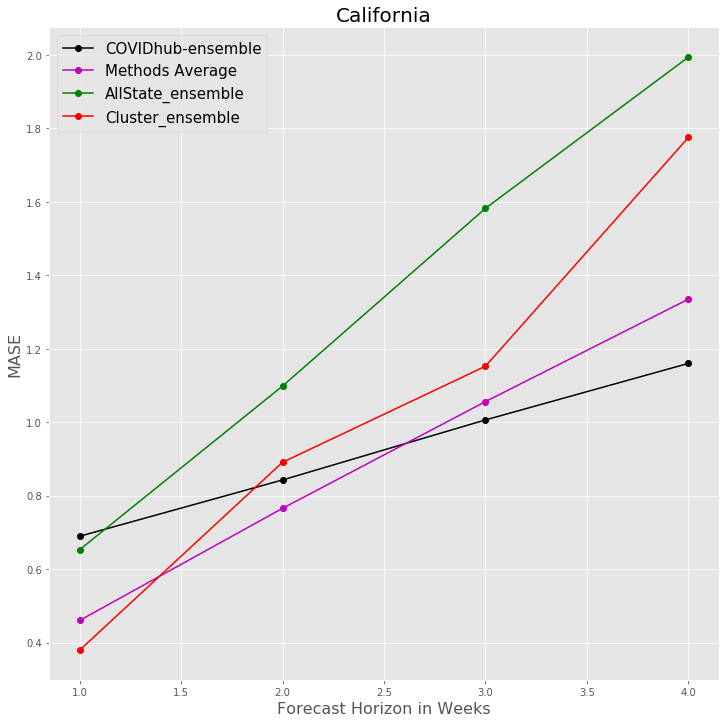

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.plot(range(1,5),CDC_list, 'k-o', label='COVIDhub-ensemble')
plt.plot(range(1,5),avg_method, 'm-o', label='Methods Average')
plt.plot(range(1,5),all_ensemble, 'g-o', label='AllState_ensemble')
plt.plot(range(1,5),cluster_ensemble, 'r-o', label='Cluster_ensemble')
plt.legend(fontsize=15)
plt.xlabel('Forecast Horizon in Weeks', fontsize=16)
plt.ylabel('MASE', fontsize=16)
plt.title('California',fontsize=20)
plt.show()

IndexError: list index out of range

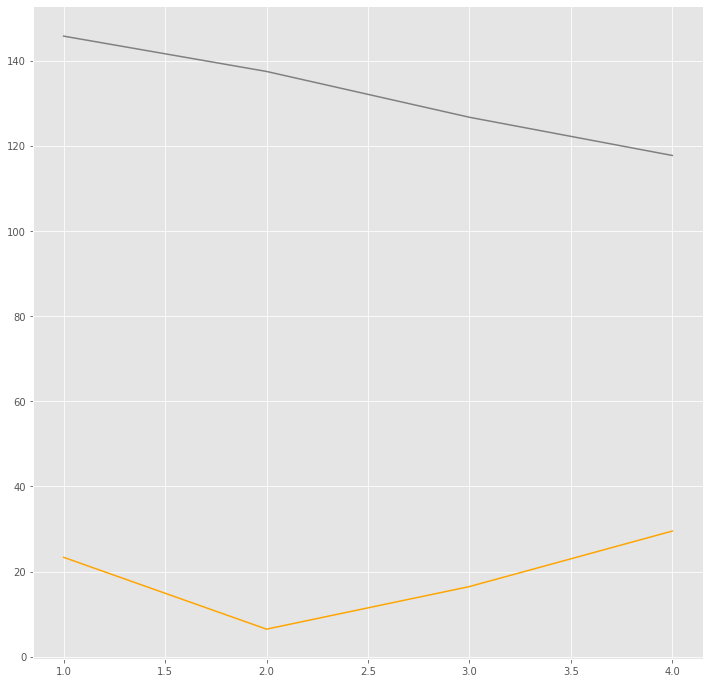

In [510]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
method_names = ['BPagano','UGA-CEID','JHU-APL','Karlen','MOBS','ESG','CovidComplete','UA','UCSD-NEU','Average','CDC Ensemble','Our Ensemble']
#method_names = ['AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI', 'IHME','Average', 'Our Ensemble']
i = 0
color_list = ['r','g','b','c','m','black','y','lime','indigo','purple','grey','orange','aqua']
for idx, a in enumerate(mase_result):
    if method_names[i]=='CDC Ensemble' or method_names[i]=='Our Ensemble':
        temp_list = a
    
        plt.plot(range(1,5),temp_list,label=method_names[i], color=color_list[i])
    i = i+1
plt.legend()
plt.title('mase error')
plt.show()

In [155]:
## process ihme model data: forecast value, start date, target date
import csv
ihme = []
with open('ihme_us.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if row[4]=='United States of America' and row[5]=='inc death' and row[3]=='2021-08-20':
            ihme.append(float(row[6])/population_map['United States of America']*100000)

In [165]:
import numpy as np
def weighted_F1(alpha, thresholds, forecast_data, truth_data):
    ## forecast_data and truth_data have the same dimension: Mxk,M is #start dates, k is #time window
    ## create a temp 2D array of kx4 for each threshold and each start date
    ## calculate WF1 for each threshold and return the avg of WF1
    WF_list=[]
    k = len(forecast_data)
    TP_total = 0
    FP_total = 0
    FN_total = 0
    for threshold in thresholds:
        temp_array = np.zeros((k,4))
        for i in range(1,k):
            temp_array[i][0] = forecast_data[i]
            ## If any point in the time until here past the threshold, forecast_above=True
            ## Otherwise, forecast_below
            #print(i,forecast_data[0:i], truth_data[0:i])
            temp_array[i][1] = np.any([x>=threshold for x in forecast_data[0:i]])    
            temp_array[i][2] = np.any([x>=threshold for x in truth_data[0:i]])
            #print(temp_array[i][1], temp_array[i][2])
            ## true positive: forecast the peak in some time range 
            if temp_array[i][1]==True and temp_array[i][2]==True:
                temp_array[i][3]=1
                TP_total += threshold*np.exp(-alpha*i)
            ## false positive: forecast a peak when there's none in a time range
            elif temp_array[i][1]==True and temp_array[i][2]==False:
                temp_array[i][3]=2
                FP_total += threshold*np.exp(-alpha*i)
            ## false negative: missing a peak in a time range 
            elif temp_array[i][1]==False and temp_array[i][2]==True:
                temp_array[i][3]=3
                FN_total += threshold*np.exp(-alpha*i)
                
    ## what if both the numerator and the denominator are 0? TN case
#     if TP_total+0.5*FP_total+0.5*FN_total==0:
#         WF = 1
#     else:
    WF = TP_total/(TP_total+0.5*FP_total+0.5*FN_total)
    WF_list.append(WF)
    return np.mean(WF_list)

In [132]:
filename = "/Users/hexuanliu/Covid-Forecast/IHME/New York_true_data.txt" 
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split("\n") for line in lines]
truth = []
truth_data = []
for i in range(len(lines)):
    truth.append(float(lines[i][0]))
for i in range(8):
    truth_data.append(truth[76+i:82+i])
print(len(truth_data[0]))

6


In [292]:
## plot results
ihme_results = []
for i in range(1,2): 
    filename = "/Users/hexuanliu/%sUS_ff.csv" %i
    with open(filename) as file:
        lines = file.readlines()
        
        lines = [(line.rstrip()).split(",") for line in lines]
    ihme_results.extend(lines)
mase_result = np.zeros((12,14)) ## #methods, #weeks
for i in range(13):
    if i%7!=0:
        
        mase_result[i%13-1]=mase_result[i%13-1]+(list(map(float, ihme_results[i][1:])))

#truth_data = [2.829614, 3.262575, 3.624903, 4.078237, 4.189536, 3.990079, 3.614222, 3.289003, 3.098490, 2.781225, 2.487595,2.206308,1.981797,2.060043]
#truth_data = [0.8633367,1.0566365, 1.2390999, 1.2423203, 1.3405585, 1.4079520, 1.2853439, 1.3134234, 1.2733642, 1.1752659, 1.1812965, 1.1719521,1.1027716,1.2515637]
#truth_data = [1.868870, 2.230611, 3.056784, 3.630795, 3.575510, 3.566112, 3.267008, 2.973829, 2.592042, 2.346914, 2.102587, 1.751276, 1.653857, 1.581585]
truth_data = [1.561177, 1.762752, 2.089377, 2.185778, 1.840391, 1.771984, 1.854504, 1.772309, 1.928728, 1.576625, 1.311577, 1.444159, 1.341157, 1.205087]
# print(mase_result)
# print(truth_data)
alpha = 0.1
top_threshold = np.quantile(mase_result, 0.95)
thresholds = [0.01, 0.1] + list(np.linspace(0,top_threshold,98))
WF_list = []
for a in mase_result:
    
    temp_list = []
    for i in range(2,14):
        WF = weighted_F1(alpha, thresholds, a[0:i], truth_data[0:i])
        temp_list.append(WF)
        #print(WF)
    WF_list.append(temp_list)

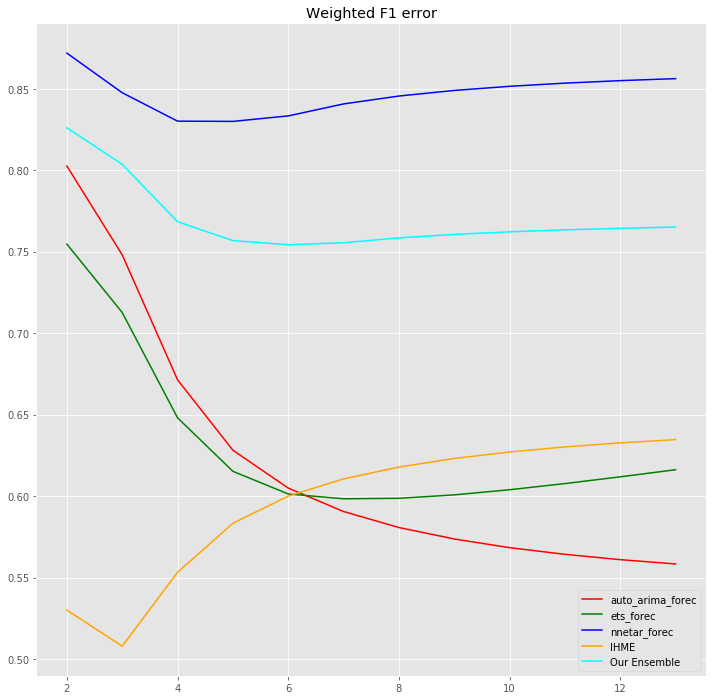

In [293]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
method_names = ['auto_arima_forec','ets_forec','nnetar_forec','tbats_forec','stlm_ar_forec','rw_drift_forec','thetaf_forec','naive_forec','snaive_forec','Average','IHME','Our Ensemble']
#method_names = ['AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI', 'IHME','Average', 'Our Ensemble']
i = 0
color_list = ['r','g','b','c','m','y','lime','indigo','purple','grey','orange','aqua','black']
for a in WF_list:
    temp_list = a
    #temp_list = list(map(float, temp_list))
    if (method_names[i]=='auto_arima_forec' or method_names[i]=='ets_forec' or method_names[i]=='nnetar_forec' or method_names[i]=='IHME' or method_names[i]=='Our Ensemble' or method_names[i]=='truth'):
        plt.plot(range(2,14),temp_list,label=method_names[i], color=color_list[i])
    i = i+1
plt.legend()
plt.title('Weighted F1 error')
plt.show()

In [294]:
## plot results
ihme_results = []
for i in range(1,2): 
    filename = "/Users/hexuanliu/%sUS_smape.csv" %i
    with open(filename) as file:
        lines = file.readlines()
        
        lines = [(line.rstrip()).split(",") for line in lines]
    ihme_results.extend(lines)
mase_result = np.zeros((12,14)) ## #methods, #weeks
for i in range(13):
    if i%13 !=0:
        
        mase_result[i%13-1]=mase_result[i%13-1]+(list(map(float, ihme_results[i][1:])))

#mase_result

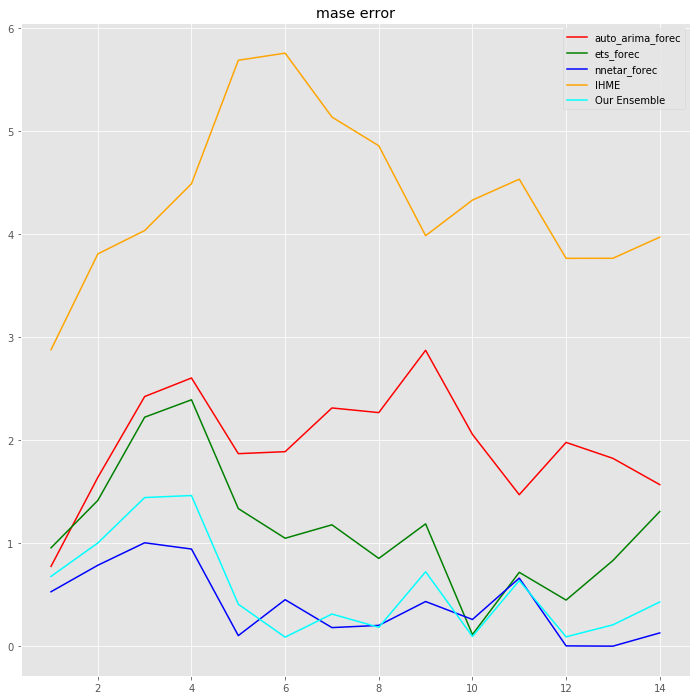

In [295]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
method_names = ['auto_arima_forec','ets_forec','nnetar_forec','tbats_forec','stlm_ar_forec','rw_drift_forec','thetaf_forec','naive_forec','snaive_forec','Average','IHME','Our Ensemble']

i = 0
color_list = ['r','g','b','c','m','y','lime','indigo','purple','grey','orange','aqua','black']
for a in mase_result:
    temp_list = a
    #temp_list = list(map(float, temp_list))
    if (method_names[i]=='auto_arima_forec' or method_names[i]=='ets_forec' or method_names[i]=='nnetar_forec' or method_names[i]=='IHME' or method_names[i]=='Our Ensemble' or method_names[i]=='truth'):
        plt.plot(range(1,15),temp_list,label=method_names[i], color=color_list[i])
    i = i+1
plt.legend()
plt.title('mase error')
plt.show()

In [296]:
##plot actual ff
ihme_results = []
for i in range(1,2): 
    filename = "/Users/hexuanliu/%sUS_ff.csv" %i
    with open(filename) as file:
        lines = file.readlines()
        
        lines = [(line.rstrip()).split(",") for line in lines]
    ihme_results.extend(lines)
mase_result = np.zeros((13,14)) ## #methods, #weeks
for i in range(13):
    if i%13 !=0:
        
        mase_result[i%13-1]=mase_result[i%13-1]+(list(map(float, ihme_results[i][1:])))
mase_result[12,:]=truth_data

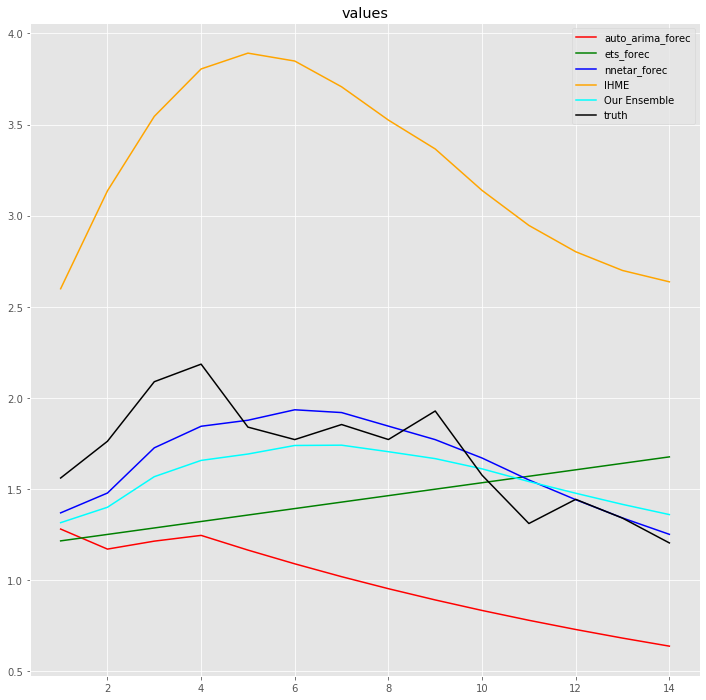

In [297]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
method_names = ['auto_arima_forec','ets_forec','nnetar_forec','tbats_forec','stlm_ar_forec','rw_drift_forec','thetaf_forec','naive_forec','snaive_forec','Average','IHME','Our Ensemble','truth']

i = 0
color_list = ['r','g','b','c','m','y','lime','indigo','purple','grey','orange','aqua','black']
for a in mase_result:
    temp_list = a
    #temp_list = list(map(float, temp_list))
    if (method_names[i]=='auto_arima_forec' or method_names[i]=='ets_forec' or method_names[i]=='nnetar_forec' or method_names[i]=='IHME' or method_names[i]=='Our Ensemble' or method_names[i]=='truth'):
        plt.plot(range(1,15),temp_list,label=method_names[i], color=color_list[i])
    i = i+1
plt.legend()
plt.title('values')
plt.show()

In [682]:
## process ihme model data: forecast value, start date, target date
import csv
ihme = []
with open('ihme_us.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if row[4]=='California' and row[5]=='inc death' and row[3]=='2021-08-20':
            ihme.append(float(row[6])/population_map['California']*100000)
            print(row)

['527', '2021', '33', '2021-08-20', 'California', 'inc death', '716.98328', '2021-08-21', 'IHME_SEIR', '6', ' CA']
['527', '2021', '34', '2021-08-20', 'California', 'inc death', '945.0671', '2021-08-28', 'IHME_SEIR', '6', ' CA']
['527', '2021', '35', '2021-08-20', 'California', 'inc death', '1151.3701999999998', '2021-09-04', 'IHME_SEIR', '6', ' CA']
['527', '2021', '36', '2021-08-20', 'California', 'inc death', '1309.821', '2021-09-11', 'IHME_SEIR', '6', ' CA']
['527', '2021', '37', '2021-08-20', 'California', 'inc death', '1402.5324', '2021-09-18', 'IHME_SEIR', '6', ' CA']
['527', '2021', '38', '2021-08-20', 'California', 'inc death', '1435.5358', '2021-09-25', 'IHME_SEIR', '6', ' CA']
['527', '2021', '39', '2021-08-20', 'California', 'inc death', '1420.0925999999997', '2021-10-02', 'IHME_SEIR', '6', ' CA']
['527', '2021', '40', '2021-08-20', 'California', 'inc death', '1379.1774999999998', '2021-10-09', 'IHME_SEIR', '6', ' CA']
['527', '2021', '41', '2021-08-20', 'California', 'inc 

In [683]:
print(ihme)

[1.8272752860274966, 2.408560706558843, 2.934336643845496, 3.33815809821928, 3.574438712675184, 3.6585498751766026, 3.6191919452438706, 3.5149173364198774, 3.411132306073148, 3.180875469279192, 2.9736966126266493, 2.811292141595169, 2.6876069312283177, 2.599751168744372, 2.5469702253712465]


In [1]:
## preprocessing of metafeatures

filename = '/Users/hexuanliu/covid_features.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(" ") for line in lines]
    print(lines)

[['"x_acf1"', '"x_acf10"', '"diff1_acf1"', '"diff1_acf10"', '"diff2_acf1"', '"diff2_acf10"', '"ARCH.LM"', '"crossing_points"', '"entropy"', '"flat_spots"', '"arch_acf"', '"garch_acf"', '"arch_r2"', '"garch_r2"', '"alpha"', '"beta"', '"hurst"', '"lumpiness"', '"nonlinearity"', '"x_pacf5"', '"diff1x_pacf5"', '"diff2x_pacf5"', '"nperiods"', '"seasonal_period"', '"trend"', '"spike"', '"linearity"', '"curvature"', '"e_acf1"', '"e_acf10"', '"stability"', '"unitroot_kpss"', '"unitroot_pp"', '"series_length"'], ['"1"', '0.924657357851176', '2.29268186197937', '0.709239235888831', '0.885152830449506', '0.110881697656063', '0.371850809882701', '0.938295359912932', '6', '0.55085703187747', '11', '0.138129790070101', '0.0298471169771164', '0.183505198360499', '0.144319677273614', '0.999899965103052', '0.993005022298673', '0.99251926774938', '0.182425116242252', '0.246117393688872', '1.08120876495426', '0.715799741791315', '0.24201377999971', '0', '1', '0.960337271537456', '1.53654531116488e-06', '

In [2]:
import numpy as np
lines = lines[1:]
meta_features = np.zeros((51,34))
for j, a in enumerate(lines):
    #print(a)
    for i in range(1,len(a)):
        meta_features[j][i-1]=float(a[i])
    

In [3]:
print(meta_features)

[[  0.92465736   2.29268186   0.70923924 ...   0.44024147  -7.63539179
   57.        ]
 [  0.95613957   3.18127058   0.554645   ...   0.74878017  -4.96344975
   57.        ]
 [  0.92722602   2.73629623   0.34331125 ...   0.81071224  -6.03800986
   57.        ]
 ...
 [  0.95329973   3.80259272   0.28649611 ...   0.62585143  -3.55175584
   57.        ]
 [  0.91692937   1.93391102   0.5400222  ...   0.21332649  -9.3646203
   57.        ]
 [  0.74809113   2.26143612  -0.2281388  ...   0.66385184 -10.74286484
   57.        ]]


In [4]:
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy
from numpy import linalg as LA
import time

def truncate_op(v, k):
    ind = np.argsort(-abs(v))
    vnew = np.zeros(len(v))
    vnew[ind[0:k]] = v[ind[0:k]]
    return vnew

def sparseEig(Q0, data, klist, m, kfinal ):
    distance_list = []
    maxiter = 200
    p = data.shape[1]
    Q = Q0
    Qnew = np.zeros((p,m))
    for j in range(0,maxiter):
        Qold = np.copy(Q)
        #print(Qold[10,0])
          
        Z = (data.T.dot(data)).dot(Q)           
        for i in range(Z.shape[1]):
            Z[:,i] = truncate_op(Z[:,i], klist[i])      

        Qp, R=LA.qr(Z, mode='reduced')

        
        for i in range(m):
            temp = truncate_op(Qp[:,i], klist[i]) 
            Qnew[:,i] = temp/LA.norm(temp)
        if Qnew[7,0]<0:
            Qnew = Qnew*(-1.0)
        #print("%.16f" % LA.norm((Qnew)-(Qold), 'fro')) 
        distance_list.append(LA.norm((Qnew.dot(Qnew.T))-(Qold.dot(Qold.T)), 'fro'))
        
        
        if j!=0 and j%50==0:
            print(klist)
            for i in range(m):    
                klist[i]=max(int(klist[i]/2), kfinal[i])
        
        Q = Qnew
                             
    print(distance_list)
    return Q, distance_list

In [5]:
mean = meta_features.mean(axis=0)
X = meta_features - mean[np.newaxis,:]
X = X/LA.norm(X,2)
p = 34
m = 3 ## number of PCs we want to keep
klist = p*np.ones(m)
klist = klist.astype(np.int)
#klist = [2,6,2]
kfinal = 8*np.ones(m)
kfinal = kfinal.astype(np.int)
kfinal = [4,8,6]
Q0 = np.random.randn(p,m)
[Q0,R]=LA.qr(Q0, mode='reduced')
[Q, d_list] = sparseEig(Q0, X, klist, m, kfinal)

[34 34 34]
[17 17 17]
[8 8 8]
[2.238172824153818, 1.0117171068598394, 0.36843231155984413, 0.06750774955536067, 0.012131401537042872, 0.0022106194119168475, 0.00040595030142512176, 7.485631038480106e-05, 1.3836825716974819e-05, 2.5616910251961245e-06, 4.747858536201568e-07, 8.806988815637464e-08, 1.6346845644298104e-08, 3.035695110424564e-09, 5.639690269525866e-10, 1.0480693824239199e-10, 1.9482324252916797e-11, 3.6220266382647565e-12, 6.735530462460199e-13, 1.2522792845426908e-13, 2.3266092476088943e-14, 4.416359230106543e-15, 9.715589032354556e-16, 5.603545785540834e-16, 6.274608664316462e-16, 4.956080824108372e-16, 6.213827374342187e-16, 6.697557764428275e-16, 6.343277919660214e-16, 5.150081076762497e-16, 4.3208239100630935e-16, 5.776966970369911e-16, 5.228453243585683e-16, 7.063848347237829e-16, 6.82664907013012e-16, 6.766013222376618e-16, 6.805324660226455e-16, 4.996852685100324e-16, 5.061425409697836e-16, 6.971976262219602e-16, 7.298946702546715e-16, 6.456641193804396e-16, 6.8573

In [6]:
LA.norm(X,2)

0.9999999999999999

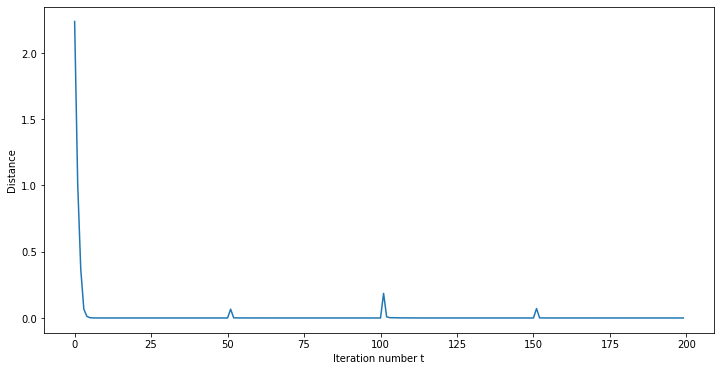

In [7]:
plt.rcParams.update({
  "text.usetex": False
})
plt.figure(figsize=(12,6))

plt.xlabel("Iteration number t")
plt.ylabel("Distance")
plt.plot(d_list)

In [8]:
print(Q)
feature_names = ['x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1','diff2_acf10', 'ARCH.LM',
                 'crossing_points','entropy','flat_spots','arch_acf','garch_acf','arch_r2','garch_r2',
                 'alpha','beta','hurst','lumpiness','nonlinearity','x_pacf5','diff1x_pacf5','diff2x_pacf5',
                 'nperiods','seasonal_period','trend','spike','linearity','curvature','e_acf1','e_acf10',
                 'stability','unitroot_kpss','unitroot_pp','series_length']
#print(len(feature_names))
idx1=np.flatnonzero(Q[:,1])
for a in idx1:
    print(feature_names[a])

[[-0.         -0.         -0.        ]
 [-0.          0.19512174  0.03822144]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [ 0.02623912  0.14218913 -0.9649775 ]
 [-0.         -0.         -0.        ]
 [-0.99482695  0.067174   -0.02920445]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.          0.03808986]
 [-0.         -0.         -0.        ]
 [-0.         -0.11667008 -0.        ]
 [-0.          0.08902826 -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.         -0.        ]
 [-0.         -0.        

In [9]:
state_names = ["US","California","Texas","New York","Washington",'Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut','Delaware', 'Florida','Georgia','Idaho', 'Illinois','Indiana', 'Iowa',
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',  'North Carolina', 'North Dakota',
               'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee','Utah', 'Vermont', 'Virginia',  'West Virginia', 'Wisconsin', 'Wyoming','District of Columbia', 'Alaska']

In [10]:
state_temp =["California","Washington","New York","Texas",'Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut','Delaware','Florida', 'Georgia','Idaho', 'Illinois','Indiana', 'Iowa',
                         'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', "Massachusetts", 'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',  'North Carolina', 'North Dakota',
                         'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee','Utah', 'Vermont', 'Virginia',  'West Virginia', 'Wisconsin', 'Wyoming']
len(state_temp)

48

In [11]:
Xnew = X.dot(-Q[:,:])

['orange', 'black', 'blue', 'purple', 'gold', 'gold', 'blue', 'gold', 'purple', 'purple', 'purple', 'blue', 'blue', 'gold', 'blue', 'grey', 'cyan', 'red', 'blue', 'purple', 'red', 'purple', 'purple', 'purple', 'blue', 'gold', 'blue', 'red', 'gold', 'blue', 'blue', 'purple', 'blue', 'yellow', 'red', 'blue', 'gold', 'blue', 'olive', 'blue', 'gold', 'red', 'red', 'blue', 'red', 'gold', 'red', 'blue', 'red', 'purple', 'gold']


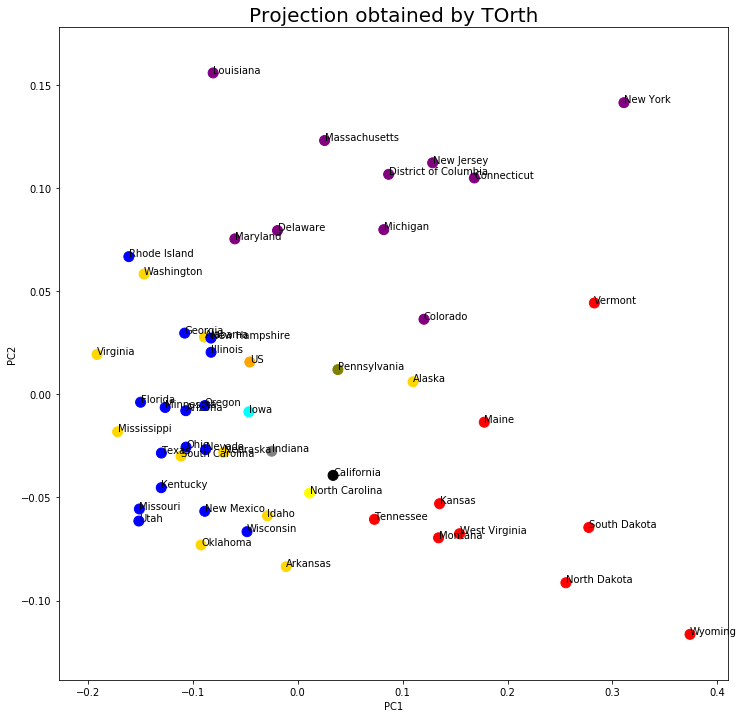

In [12]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10,assign_labels='kmeans',random_state=0)
clustering = sc.fit_predict(Xnew)  
y_pred=clustering
## change color scheme
colorlist = ['red','blue','yellow','purple','orange','cyan','grey','olive','black','gold','navy']
clist = []
for i in range(len(y_pred)):
    #print(y_pred[i])
    clist.append(colorlist[y_pred[i]])
print(clist)
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,c=clist)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection obtained by TOrth",fontsize=20)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]))

plt.show()

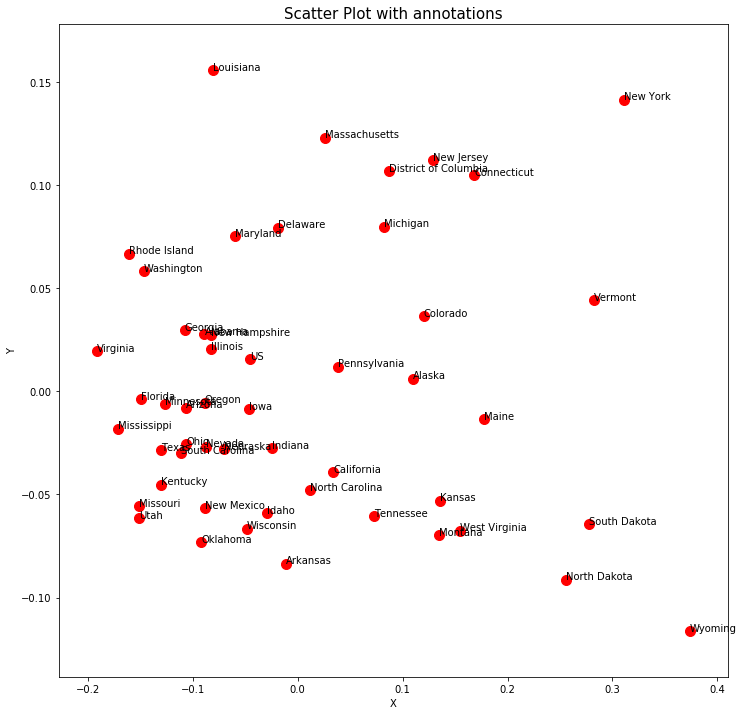

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]))

plt.show()


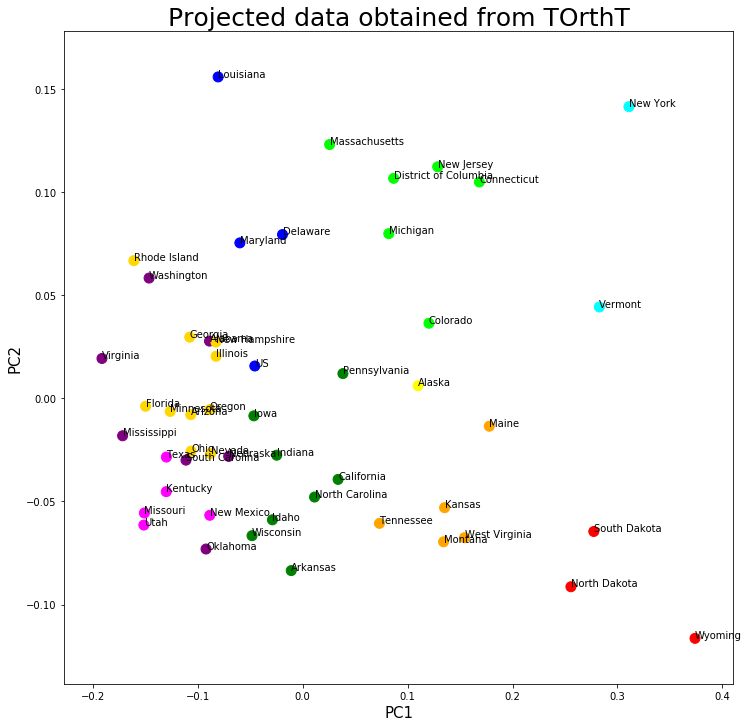

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(Xnew)
y_pred=kmeans.labels_
## change color scheme
colorlist = ['red','blue','purple','yellow', 'orange','cyan','lime','green','magenta','gold','navy','black']
clist = []
for i in range(len(y_pred)):
    #print(y_pred[i])
    clist.append(colorlist[y_pred[i]])

plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,c=clist)
plt.xlabel("PC1",fontsize=15)
plt.ylabel("PC2",fontsize=15)
plt.title("Projected data obtained from TOrthT",fontsize=25)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]), fontsize=10)

plt.show()



In [16]:
for i in range(10):
    temp=[]
    for j in range(51):
        if y_pred[j]==i:
            temp.append(state_names[j])
    print(i, temp)

0 ['North Dakota', 'South Dakota', 'Wyoming']
1 ['US', 'Delaware', 'Louisiana', 'Maryland']
2 ['Washington', 'Alabama', 'Mississippi', 'Nebraska', 'Oklahoma', 'South Carolina', 'Virginia']
3 ['Alaska']
4 ['Kansas', 'Maine', 'Montana', 'Tennessee', 'West Virginia']
5 ['New York', 'Vermont']
6 ['Colorado', 'Connecticut', 'Massachusetts', 'Michigan', 'New Jersey', 'District of Columbia']
7 ['California', 'Arkansas', 'Idaho', 'Indiana', 'Iowa', 'North Carolina', 'Pennsylvania', 'Wisconsin']
8 ['Texas', 'Kentucky', 'Missouri', 'New Mexico', 'Utah']
9 ['Arizona', 'Florida', 'Georgia', 'Illinois', 'Minnesota', 'Nevada', 'New Hampshire', 'Ohio', 'Oregon', 'Rhode Island']


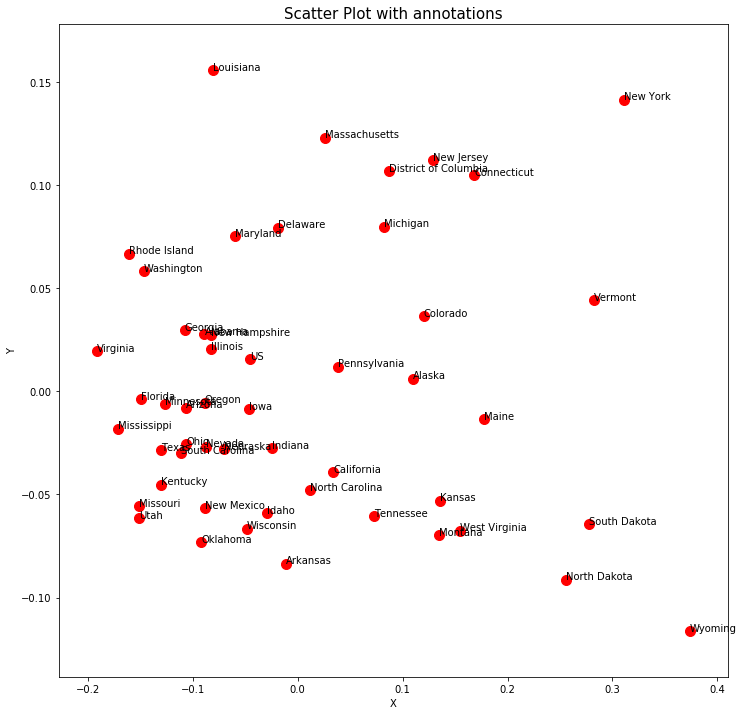

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]))

plt.show()

PCs = meta_features.dot(Q)
#plt.plot(V0[:,0], V0[:,1], '.')

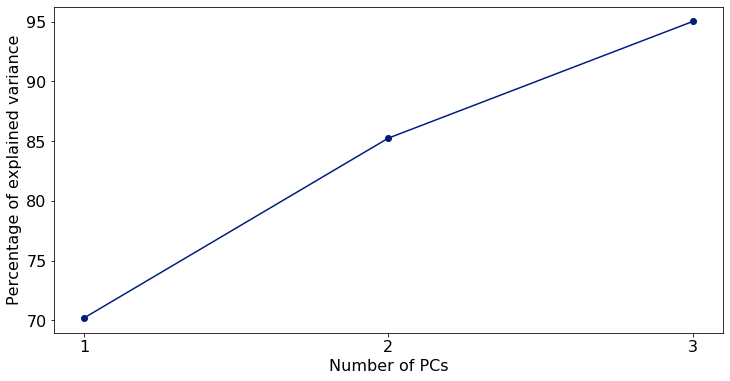

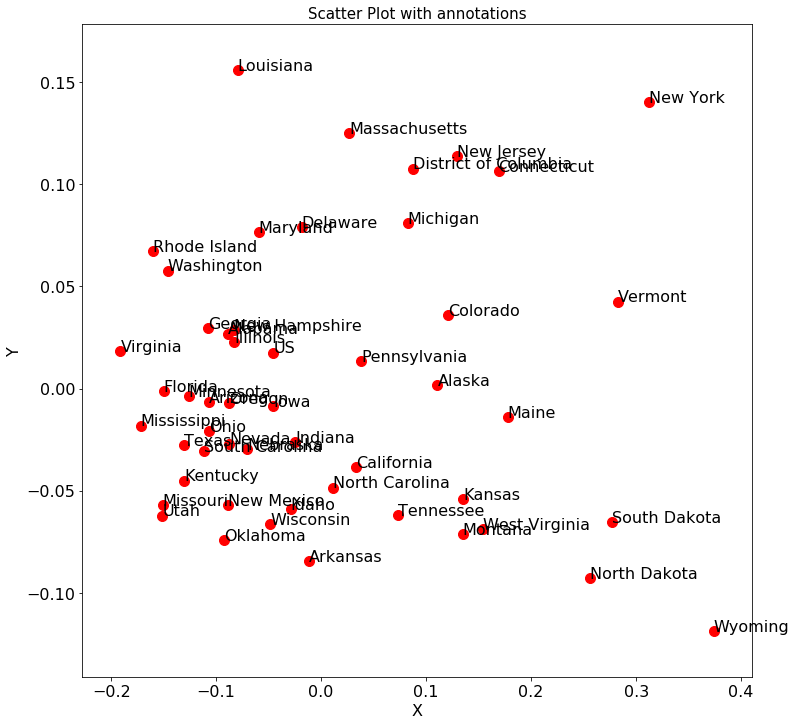

In [26]:
## standard PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
Xnew = pca.fit_transform(X)

V0=pca.components_.T
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
plt.plot(list(range(1,4)),np.cumsum(pca.explained_variance_ratio_*100),'o-')
plt.xticks(list(range(1,4)))
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of explained variance")


plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]))

plt.show()

PCs = meta_features.dot(Q)
#plt.plot(V0[:,0], V0[:,1], '.')

['yellow', 'yellow', 'magenta', 'blue', 'green', 'green', 'magenta', 'yellow', 'lime', 'lime', 'orange', 'magenta', 'magenta', 'yellow', 'magenta', 'yellow', 'yellow', 'red', 'magenta', 'orange', 'red', 'orange', 'orange', 'lime', 'magenta', 'green', 'magenta', 'red', 'black', 'magenta', 'magenta', 'lime', 'magenta', 'yellow', 'purple', 'magenta', 'black', 'magenta', 'yellow', 'magenta', 'black', 'purple', 'red', 'magenta', 'blue', 'green', 'red', 'yellow', 'cyan', 'lime', 'gold']


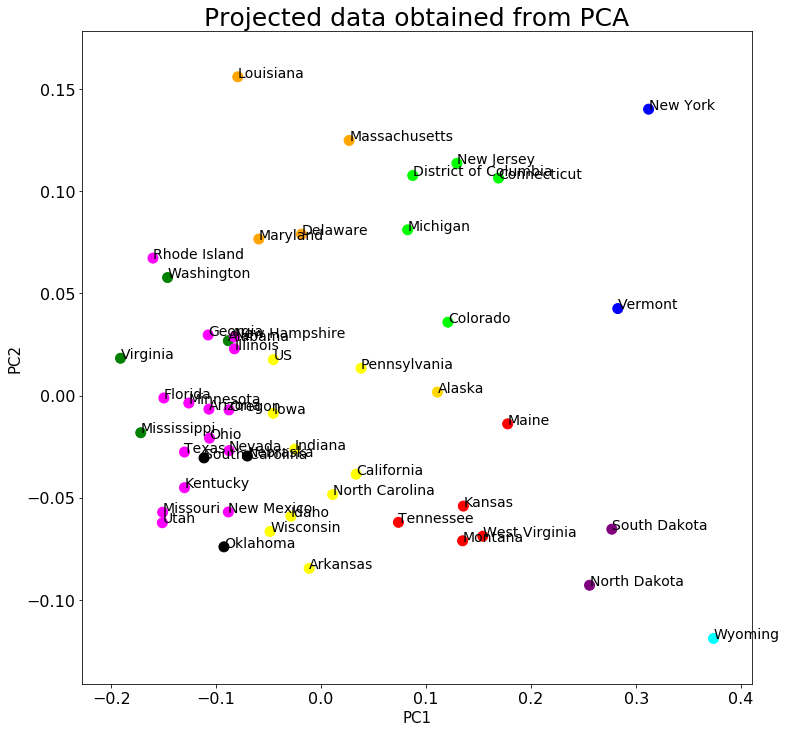

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, random_state=0).fit(Xnew)
y_pred=kmeans.labels_
## change color scheme
colorlist = ['green','lime','magenta','blue','red','yellow','gold','cyan','purple','orange','black']
clist = []
for i in range(len(y_pred)):
    #print(y_pred[i])
    clist.append(colorlist[y_pred[i]])
print(clist)
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,c=clist)
plt.xlabel("PC1",fontsize=15)
plt.ylabel("PC2",fontsize=15)
plt.title("Projected data obtained from PCA",fontsize=25)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]), fontsize=14)

plt.show()




['orange', 'black', 'blue', 'purple', 'gold', 'gold', 'blue', 'gold', 'purple', 'purple', 'purple', 'blue', 'blue', 'gold', 'blue', 'grey', 'cyan', 'red', 'blue', 'purple', 'red', 'purple', 'purple', 'purple', 'blue', 'gold', 'blue', 'red', 'gold', 'blue', 'blue', 'purple', 'blue', 'yellow', 'red', 'blue', 'gold', 'blue', 'olive', 'blue', 'gold', 'red', 'red', 'blue', 'red', 'gold', 'red', 'blue', 'red', 'purple', 'gold']


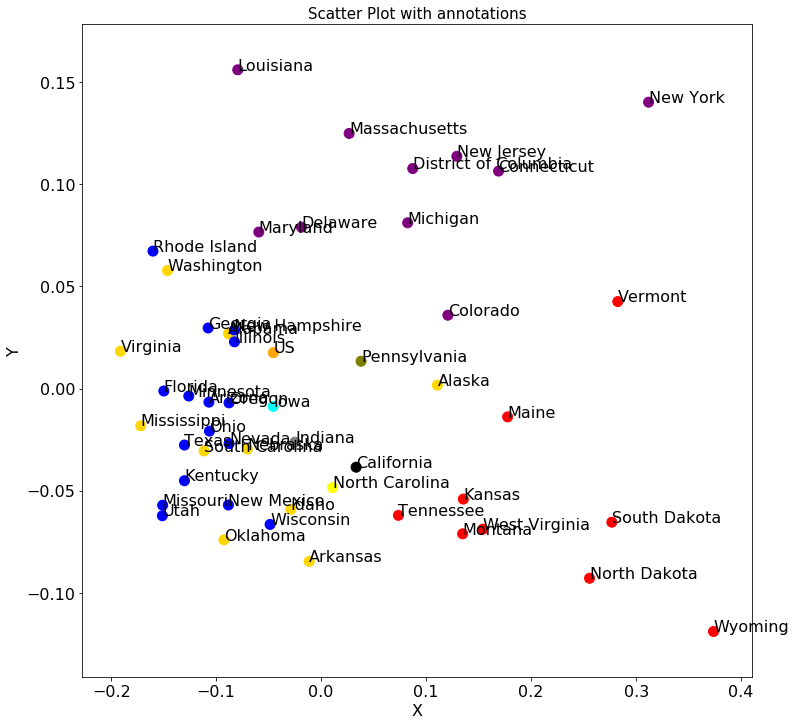

In [24]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10,assign_labels='kmeans',random_state=0)
clustering = sc.fit_predict(Xnew)  
y_pred=clustering
## change color scheme
colorlist = ['red','blue','yellow','purple','orange','cyan','grey','olive','black','gold','navy']
clist = []
for i in range(len(y_pred)):
    #print(y_pred[i])
    clist.append(colorlist[y_pred[i]])
print(clist)
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(12,12))
plt.scatter(Xnew[:,0],Xnew[:,1],s=100,c=clist)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(state_names):
    plt.annotate(label, (Xnew[i,0], Xnew[i,1]))

plt.show()



In [28]:
for i in range(10):
    temp=[]
    for j in range(51):
        if y_pred[j]==i:
            temp.append(state_names[j])
    print(i, temp)

0 ['Washington', 'Alabama', 'Mississippi', 'Virginia']
1 ['Colorado', 'Connecticut', 'Michigan', 'New Jersey', 'District of Columbia']
2 ['Texas', 'Arizona', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Minnesota', 'Missouri', 'Nevada', 'New Hampshire', 'New Mexico', 'Ohio', 'Oregon', 'Rhode Island', 'Utah']
3 ['New York', 'Vermont']
4 ['Kansas', 'Maine', 'Montana', 'Tennessee', 'West Virginia']
5 ['US', 'California', 'Arkansas', 'Idaho', 'Indiana', 'Iowa', 'North Carolina', 'Pennsylvania', 'Wisconsin']
6 ['Alaska']
7 ['Wyoming']
8 ['North Dakota', 'South Dakota']
9 ['Delaware', 'Louisiana', 'Maryland', 'Massachusetts']
